In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
df = pd.read_csv("/content/drive/My Drive/Colab Notebooks/data/diabetes/diabetes.csv")
df.shape

(768, 9)

In [4]:
df.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [8]:
df.null=df.isnull()
df.null


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """Entry point for launching an IPython kernel.


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
763,False,False,False,False,False,False,False,False,False
764,False,False,False,False,False,False,False,False,False
765,False,False,False,False,False,False,False,False,False
766,False,False,False,False,False,False,False,False,False


In [9]:
df.null.sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [11]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
feature_columns = df.columns[0:-1].tolist()
feature_columns

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age']

In [7]:
cols = feature_columns[1:]
cols

['Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age']

In [14]:
df_null = df[cols].replace(0,np.nan)
df_null = df_null.isnull()
df_null.sum()

Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
dtype: int64

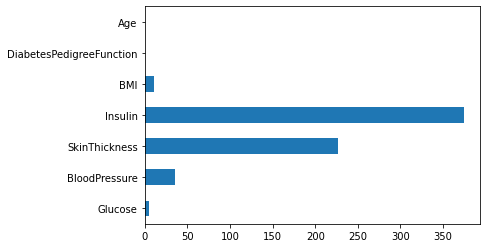

In [15]:
df_null.sum().plot.barh()

In [16]:
df_null.mean() * 100

Glucose                      0.651042
BloodPressure                4.557292
SkinThickness               29.557292
Insulin                     48.697917
BMI                          1.432292
DiabetesPedigreeFunction     0.000000
Age                          0.000000
dtype: float64

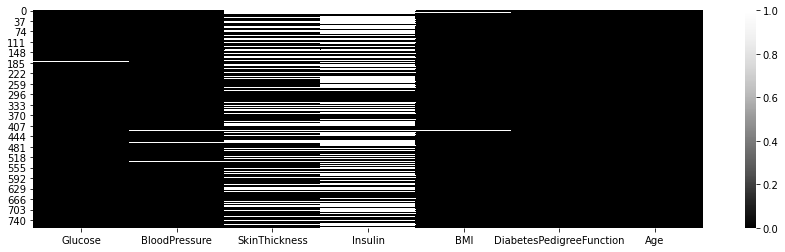

In [17]:
plt.figure(figsize=(15, 4))
sns.heatmap(df_null, cmap="Greys_r")

In [18]:
df['Outcome']

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [19]:
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [20]:
df['Outcome'].value_counts(normalize=True)

0    0.651042
1    0.348958
Name: Outcome, dtype: float64

In [21]:
df.groupby(["Pregnancies"])["Outcome"].mean()

Pregnancies
0     0.342342
1     0.214815
2     0.184466
3     0.360000
4     0.338235
5     0.368421
6     0.320000
7     0.555556
8     0.578947
9     0.642857
10    0.416667
11    0.636364
12    0.444444
13    0.500000
14    1.000000
15    1.000000
17    1.000000
Name: Outcome, dtype: float64

In [23]:
df.groupby(["Pregnancies"])["Outcome"].agg(["mean","count"])

,mean,count
Pregnancies,,
0,0.342342,111
1,0.214815,135
2,0.184466,103
3,0.360000,75
4,0.338235,68
5,0.368421,57
6,0.320000,50
7,0.555556,45
8,0.578947,38


In [24]:
df_po = df.groupby(["Pregnancies"])["Outcome"].agg(["mean","count"]).reset_index()
df_po

,Pregnancies,mean,count
0,0,0.342342,111
1,1,0.214815,135
2,2,0.184466,103
3,3,0.360000,75
4,4,0.338235,68
5,5,0.368421,57
6,6,0.320000,50
7,7,0.555556,45
8,8,0.578947,38
9,9,0.642857,28


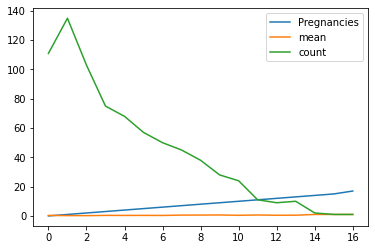

In [25]:
df_po.plot()

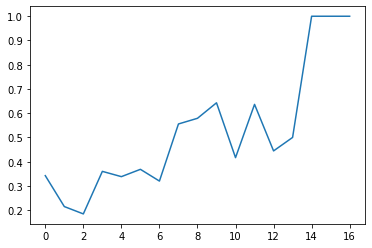

In [26]:
df_po["mean"].plot()

TypeError: ignored

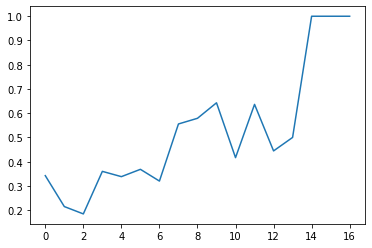

In [28]:
df_po["mean"].plot().bar()

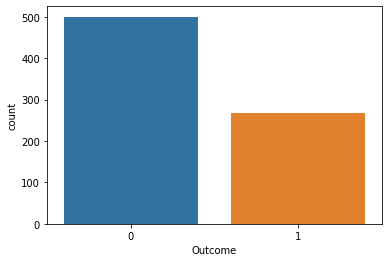

In [30]:
sns.countplot(data=df,x="Outcome")

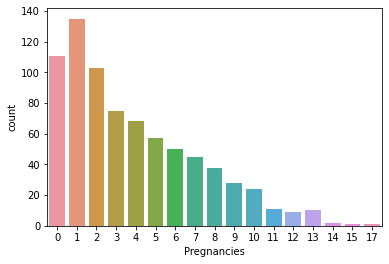

In [32]:
sns.countplot(data = df, x="Pregnancies")

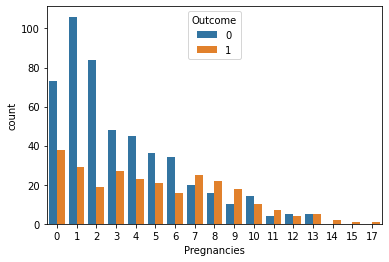

In [34]:
sns.countplot(data =df,x="Pregnancies", hue="Outcome")

In [37]:
df["Pregnancies_high"] = df["Pregnancies"]>6
df[["Pregnancies_high", "Pregnancies"]].head()

,Pregnancies_high,Pregnancies
0,False,6
1,False,1
2,True,8
3,False,1
4,False,0


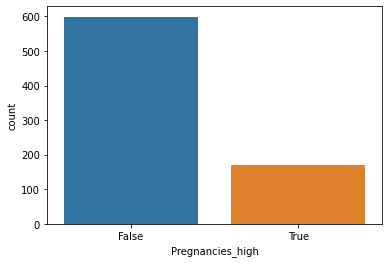

In [38]:
sns.countplot(data=df, x ="Pregnancies_high")

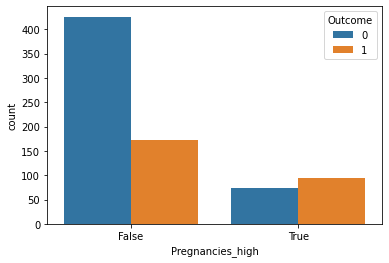

In [39]:
sns.countplot(data=df, x ="Pregnancies_high", hue = "Outcome")

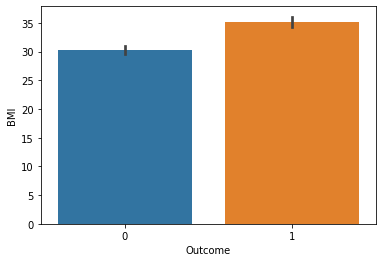

In [40]:
sns.barplot(data=df,x="Outcome",y="BMI")

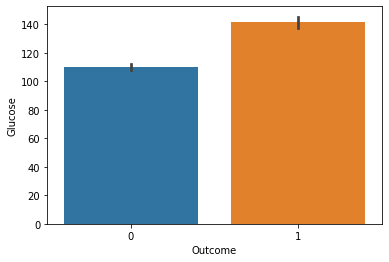

In [41]:
sns.barplot(data=df,x="Outcome",y="Glucose")

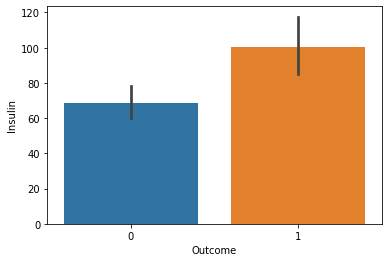

In [42]:
sns.barplot(data=df,x="Outcome",y="Insulin")
# 검은 색 막대는 95프로의 신뢰구간을 나타낸다

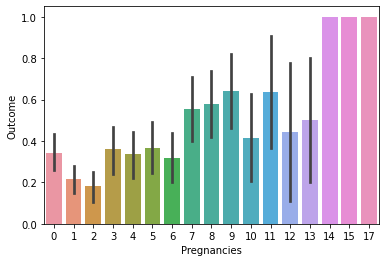

In [43]:
sns.barplot(data=df,x="Pregnancies",y="Outcome")

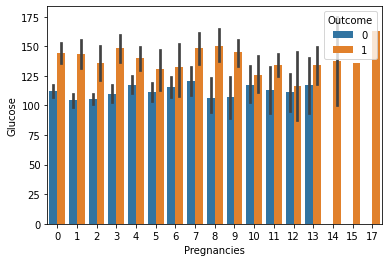

In [44]:
sns.barplot(data=df,x="Pregnancies", y="Glucose", hue = "Outcome")

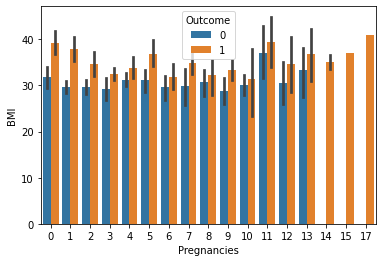

In [45]:
sns.barplot(data=df, x="Pregnancies", y="BMI", hue="Outcome")
 

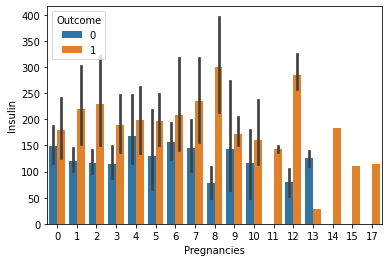

In [50]:
sns.barplot(data = df[df["Insulin"]>0], x="Pregnancies", y="Insulin", hue="Outcome")

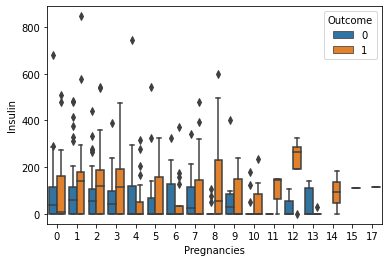

In [47]:
sns.boxplot(data=df, x="Pregnancies", y="Insulin", hue="Outcome")

//0의 값이 많기때문에 주저 않아있는 모습을 볼 수 있다.

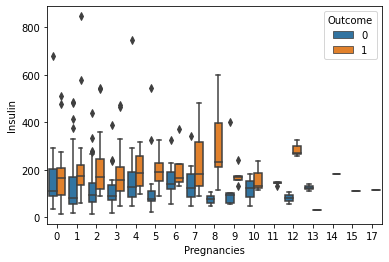

In [48]:
sns.boxplot(data=df[df["Insulin"]>0], x="Pregnancies", y="Insulin", hue="Outcome")

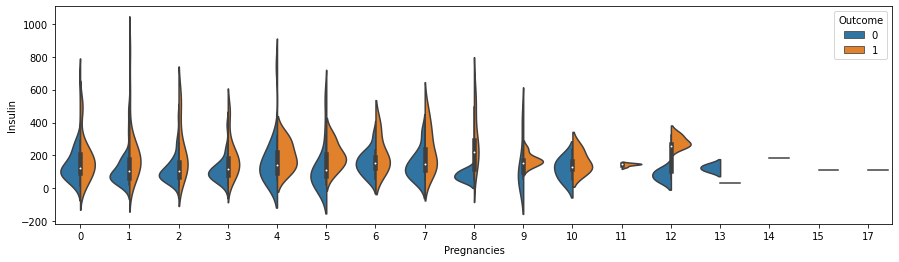

In [53]:
plt.figure(figsize=(15,4))
sns.violinplot(data=df[df["Insulin"]>0], x="Pregnancies", y="Insulin", hue="Outcome",split="True")

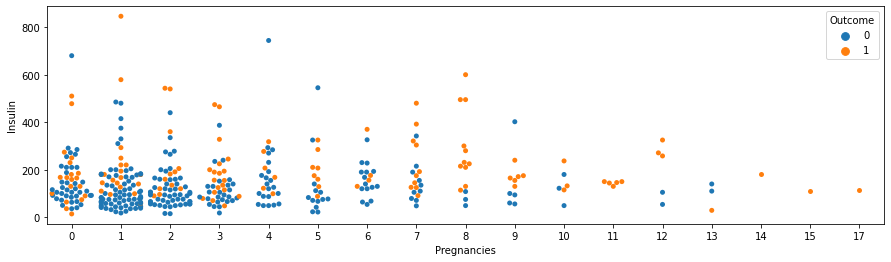

In [52]:
plt.figure(figsize=(15,4))
sns.swarmplot(data=df[df["Insulin"]>0], x="Pregnancies", y="Insulin", hue="Outcome")

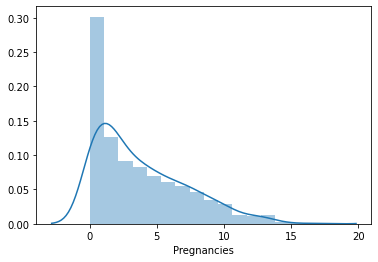

In [56]:
sns.distplot(df["Pregnancies"])
# 선은 밀도를 표시해주는 선

In [9]:
df_0 = df[df["Outcome"]==0]
df_1 = df[df["Outcome"]==1]
df_0.shape, df_1.shape

((500, 9), (268, 9))

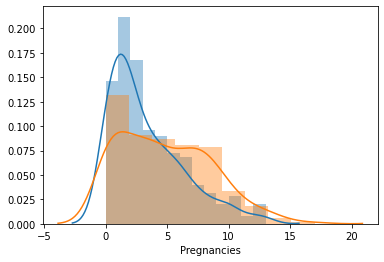

In [58]:
sns.distplot(df_0["Pregnancies"])
sns.distplot(df_1["Pregnancies"])

# 5를 기점으로 임신횟수가 많을수록 확률이 더 높아진다.

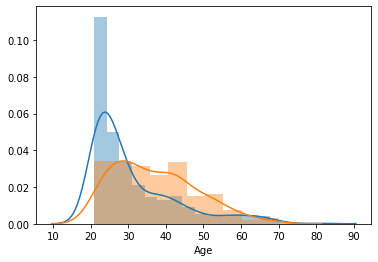

In [59]:
sns.distplot(df_0["Age"])
sns.distplot(df_1["Age"])
# 30세 이후에는 발병하는 케이스가 더많다


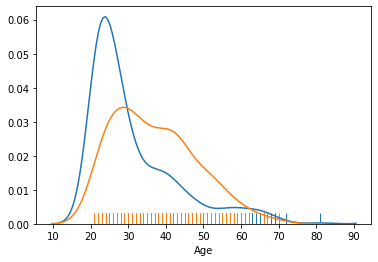

In [62]:
sns.distplot(df_0["Age"], hist = False, rug=True)
sns.distplot(df_1["Age"], hist =False, rug=True)

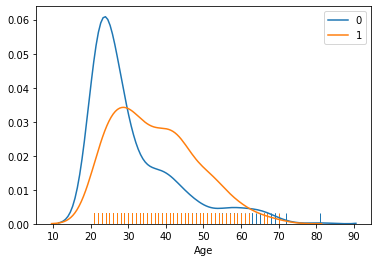

In [63]:
sns.distplot(df_0["Age"], hist=False, rug=True, label=0)
sns.distplot(df_1["Age"], hist=False, rug=True, label=1)

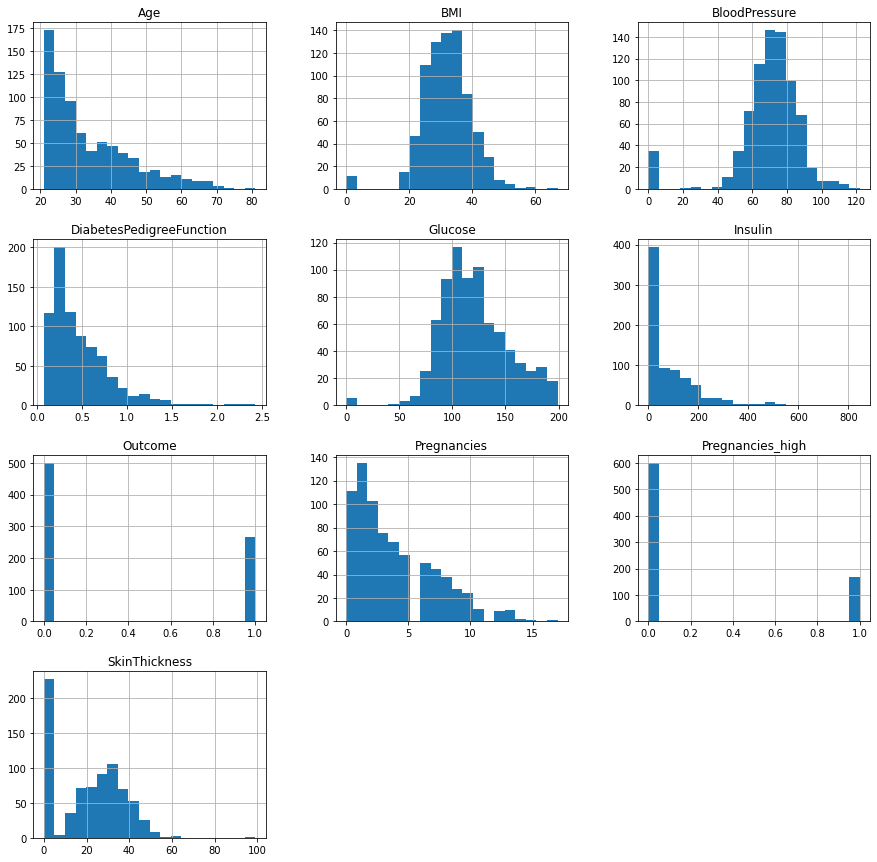

In [66]:
# hist 는 boolean 값을 지원하지 않는다
df["Pregnancies_high"] = df["Pregnancies_high"].astype(int)
h = df.hist(figsize=(15,15), bins = 20)
#bins는 막대의 갯수 좀더 자세하게 보고싶을때 사용

In [68]:
col_num = df.columns.shape
col_num

(10,)

In [71]:
cols = df.columns.tolist()
cols

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age',
 'Outcome',
 'Pregnancies_high']

IndexError: ignored

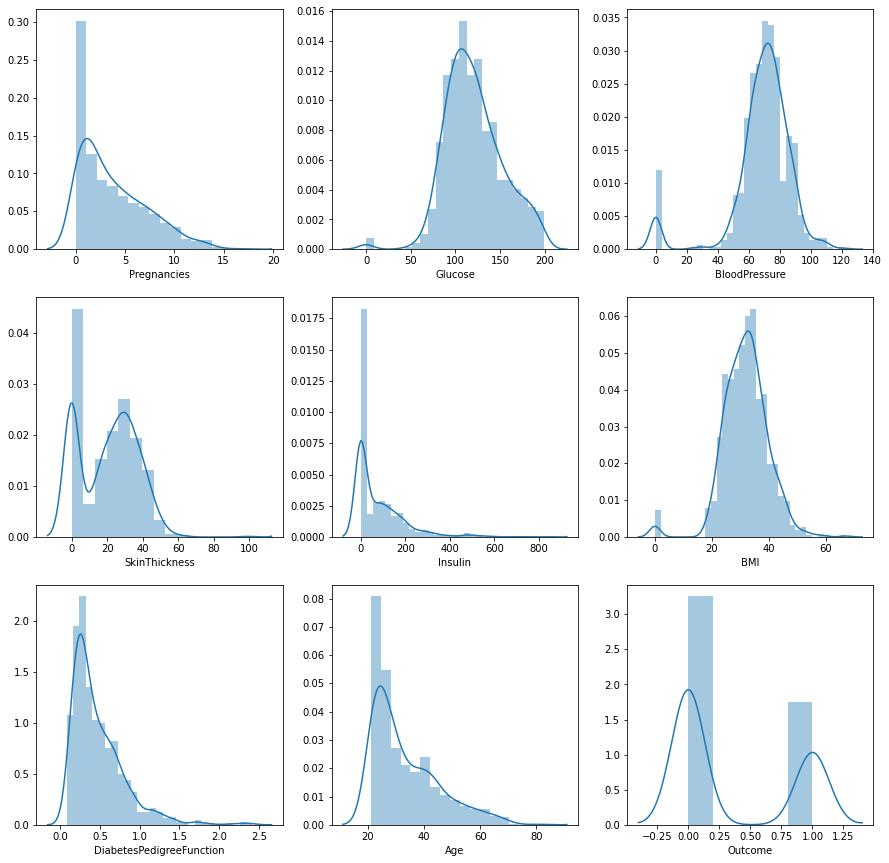

In [73]:
# displot 으로 서브 플롯을 그립니다.
fig, axes = plt.subplots(nrows=3, ncols=3,figsize=(15,15))
for i, col_name in enumerate(cols) :
  row = i//3
  col = i%3
  sns.distplot(df[col_name], ax = axes[row][col])

In [74]:
cols = df.columns[:-1].tolist()
cols
 

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age',
 'Outcome']

IndexError: ignored

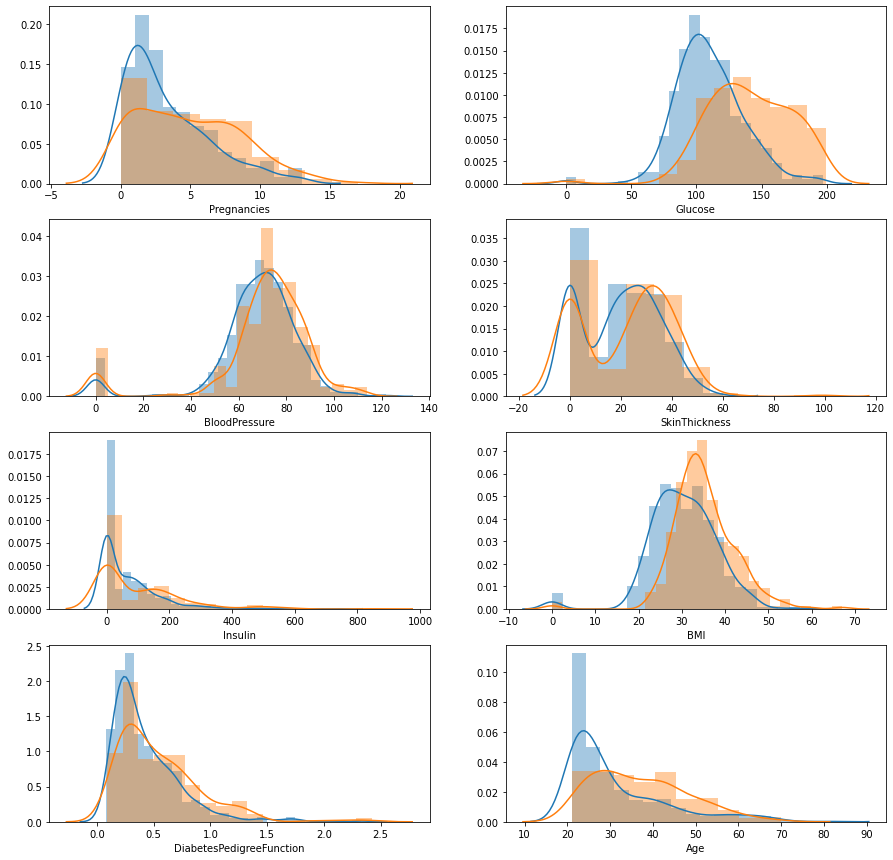

In [75]:
# displot 으로 서브 플롯을 그립니다.
fig, axes = plt.subplots(nrows=4, ncols=2,figsize=(15,15))
for i, col_name in enumerate(cols) :
  row = i//2
  col = i%2
  sns.distplot(df_0[col_name], ax = axes[row][col])
  sns.distplot(df_1[col_name], ax = axes[row][col])

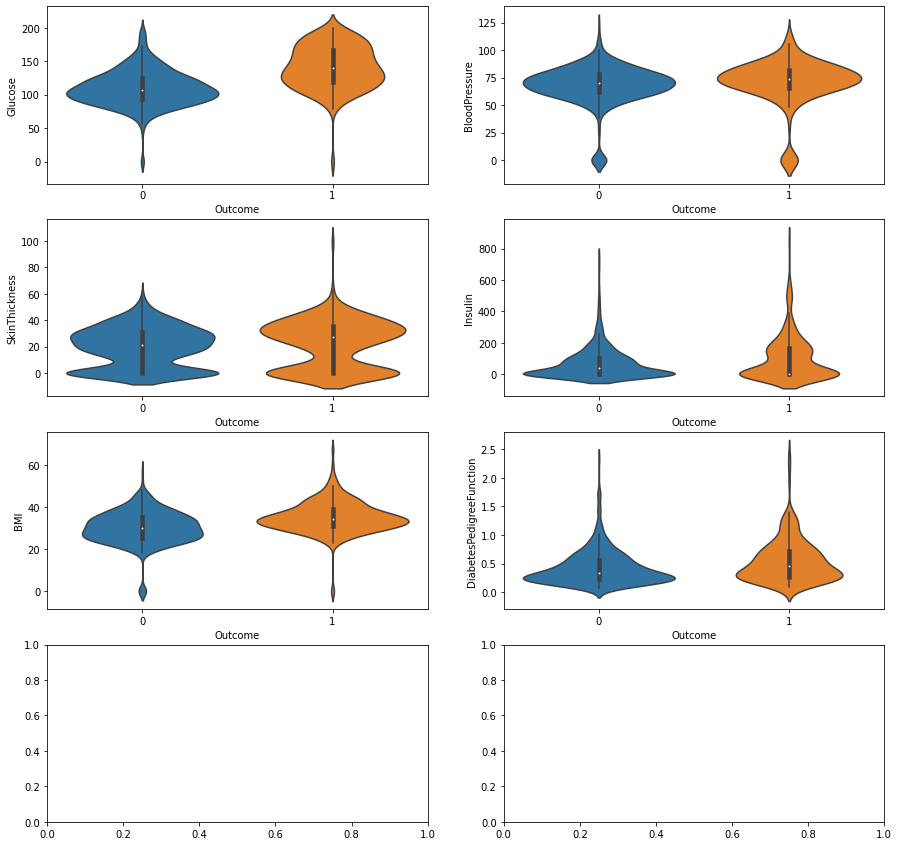

In [10]:
 fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(15, 15))

for i, col_name in enumerate(cols[:-1]):
  row = i // 2
  col = i % 2
  sns.violinplot(data=df,  x="Outcome", y=col_name, ax=axes[row][col])

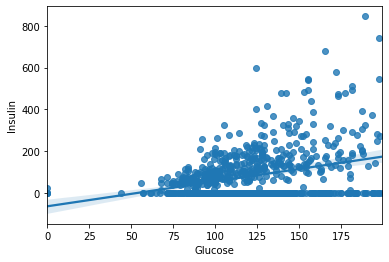

In [12]:
sns.regplot(data = df, x="Glucose",y="Insulin")

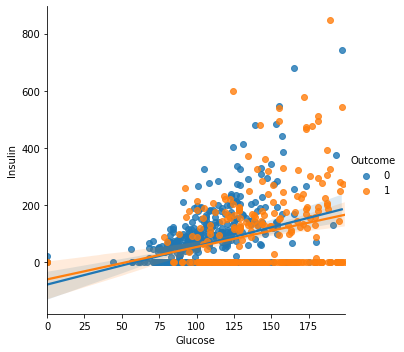

In [13]:
sns.lmplot(data=df, x="Glucose", y="Insulin", hue="Outcome")

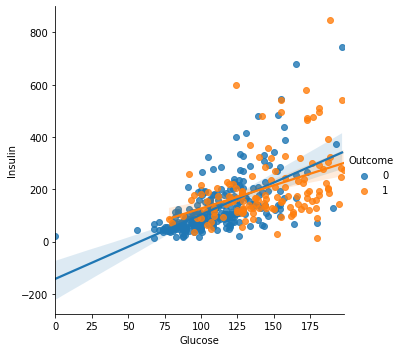

In [14]:
sns.lmplot(data=df[df["Insulin"]>0], x="Glucose", y="Insulin", hue="Outcome")

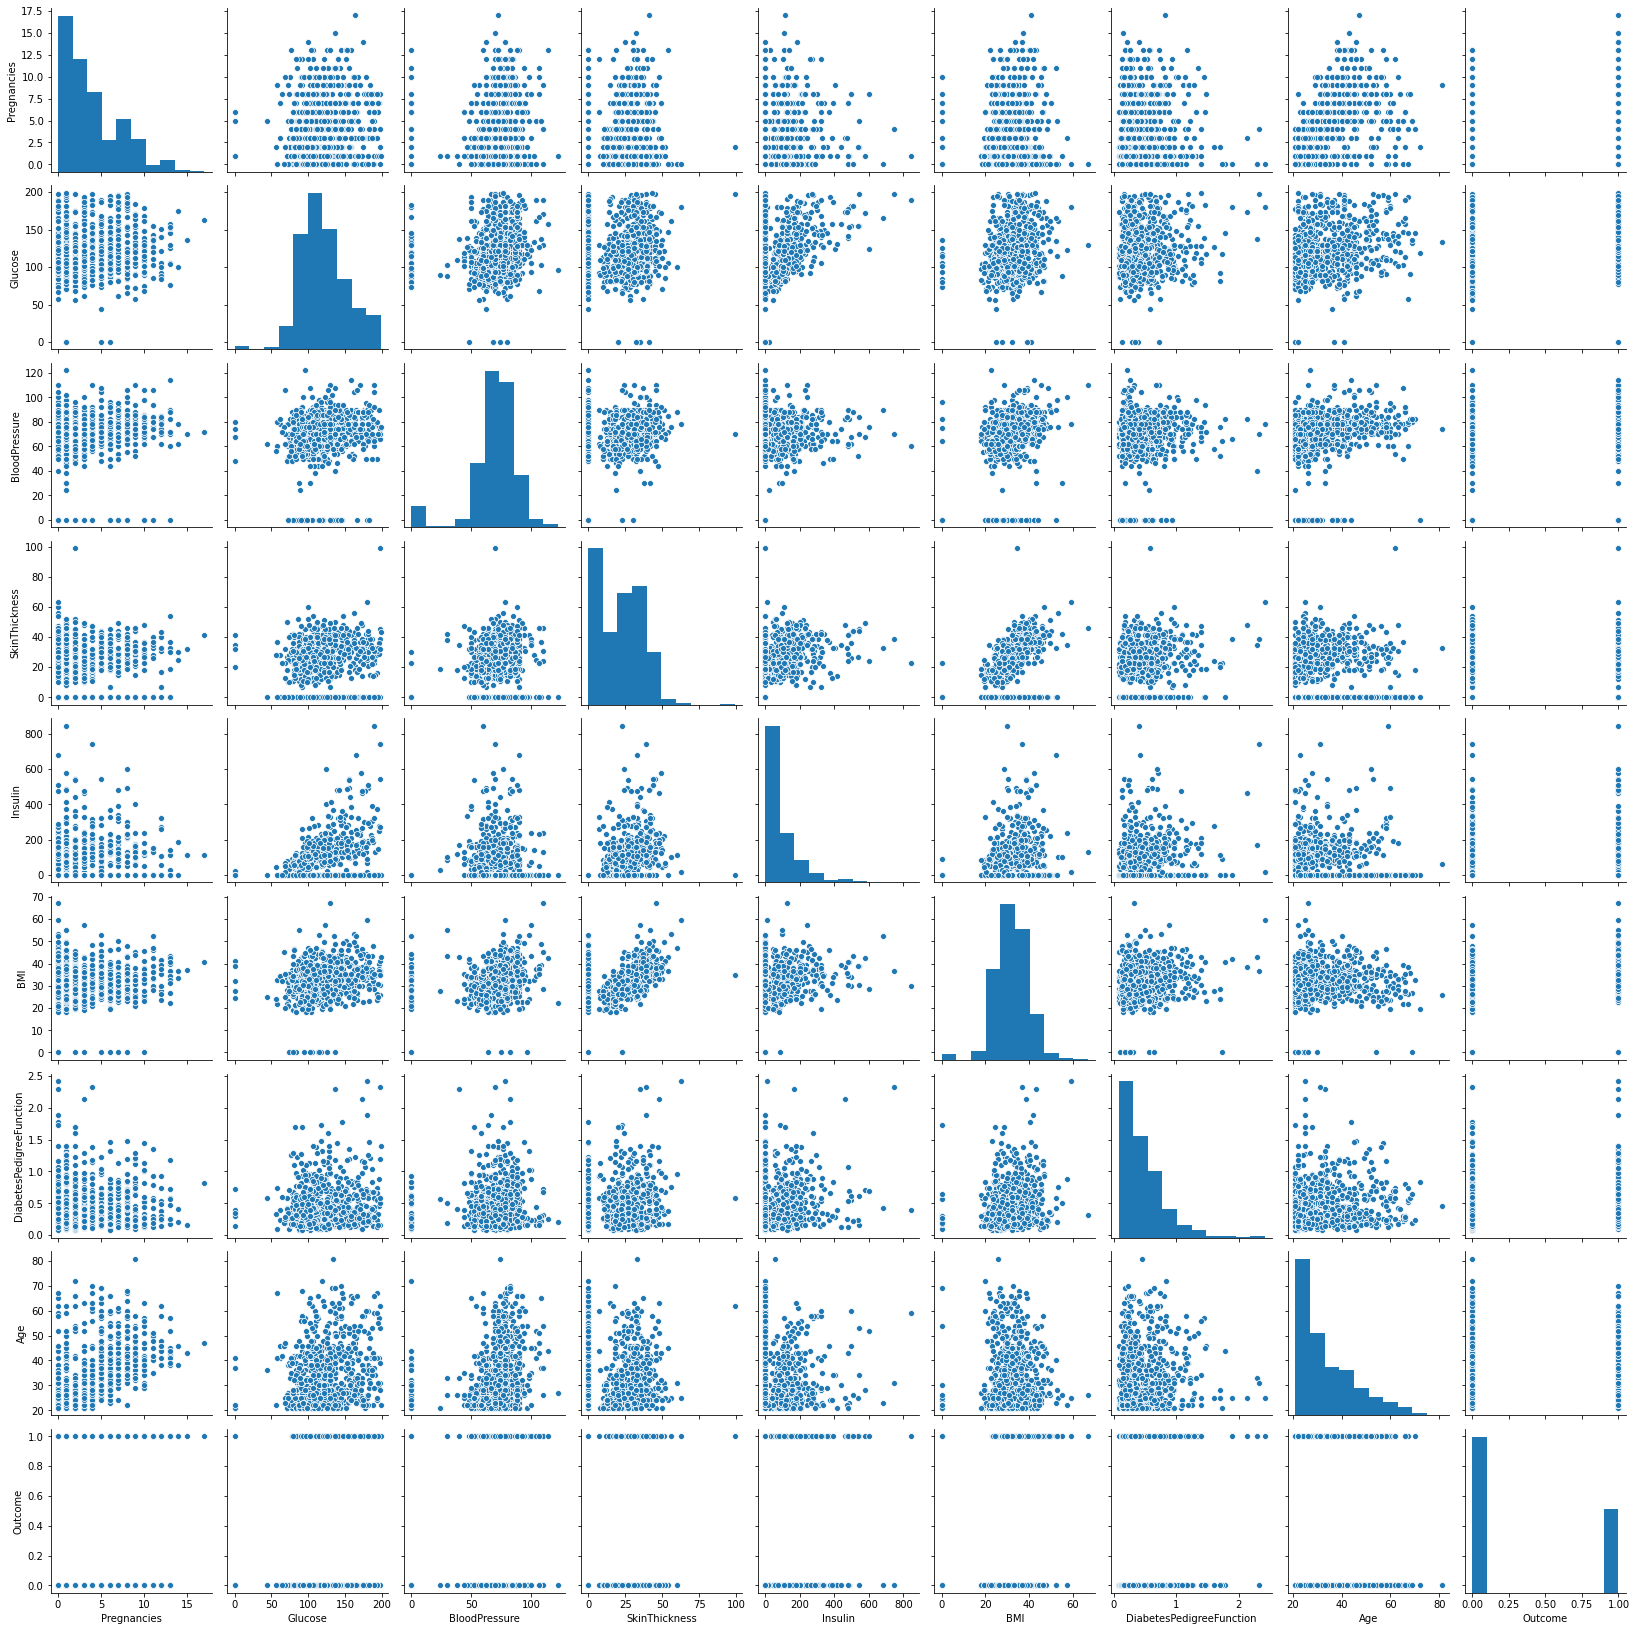

In [15]:
sns.pairplot(df)

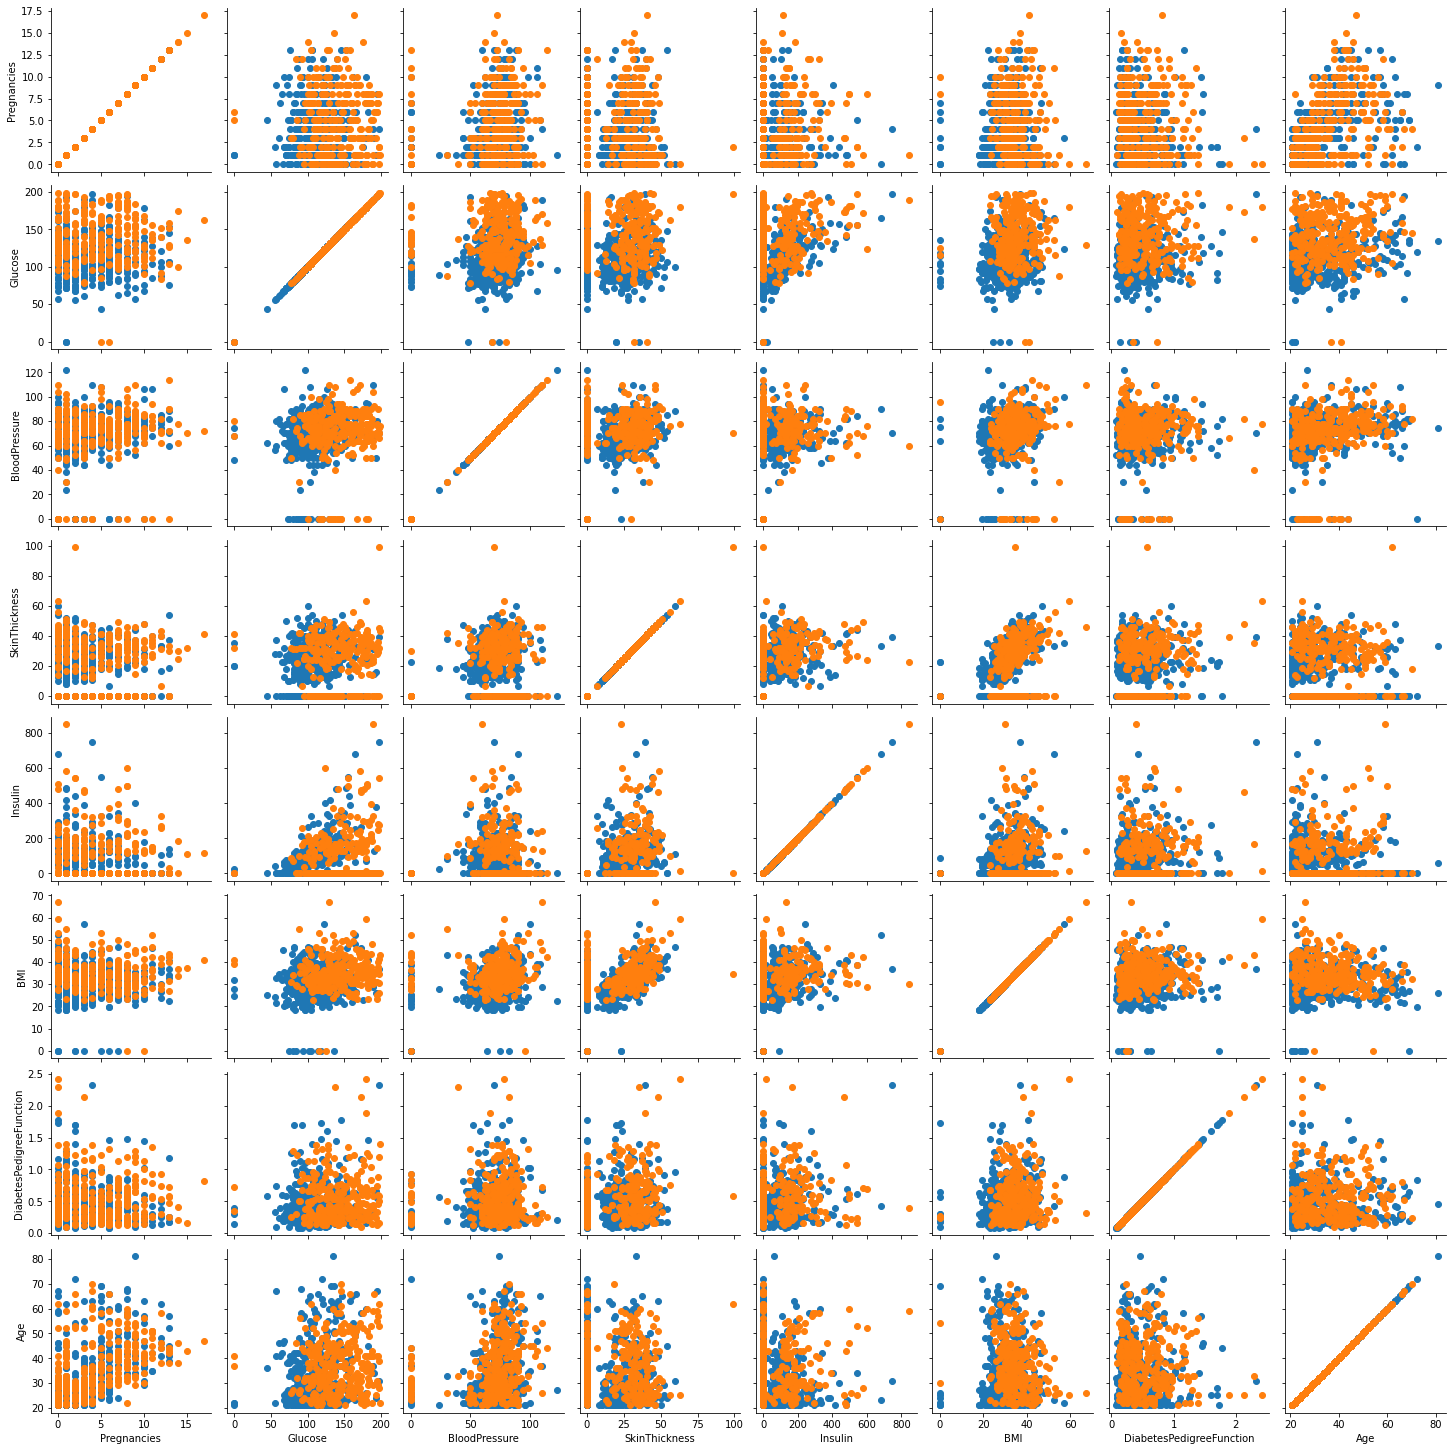

In [17]:
g = sns.PairGrid(df, hue = "Outcome")
g.map(plt.scatter)

In [19]:
df_corr = df.corr()
df_corr.style.background_gradient()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


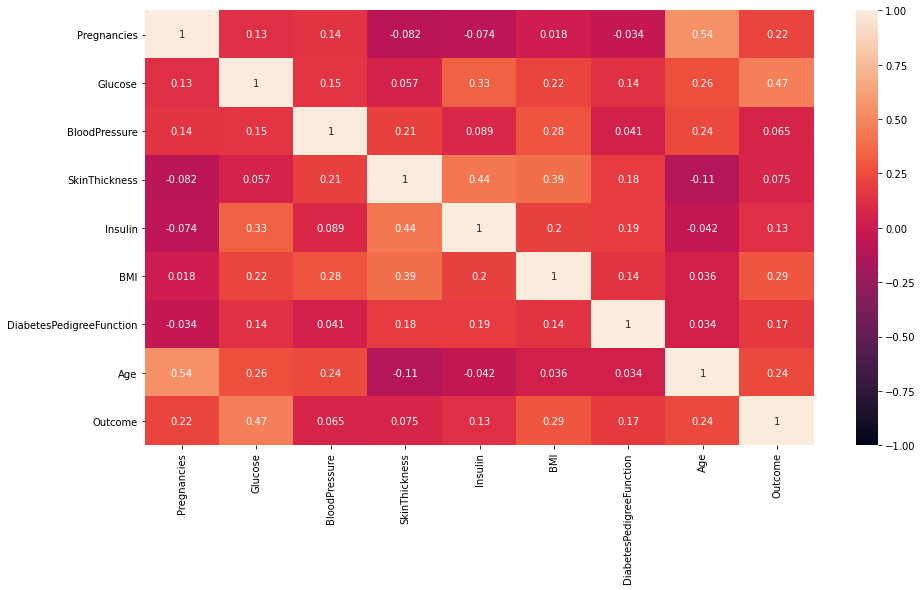

In [21]:
plt.figure(figsize=(15,8))
sns.heatmap(df_corr, vmax=1, vmin=-1,annot=True)

In [22]:
df_matrix = df.iloc[:,:-2].replace(0, np.nan)
df_matrix["Outcome"] = df["Outcome"]
df_matrix.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Outcome
0,6.0,148.0,72.0,35.0,NaN,33.6,0.627,1
1,1.0,85.0,66.0,29.0,NaN,26.6,0.351,0
2,8.0,183.0,64.0,NaN,NaN,23.3,0.672,1
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,0
4,NaN,137.0,40.0,35.0,168.0,43.1,2.288,1


In [23]:
df_corr["Outcome"]

Pregnancies                 0.221898
Glucose                     0.466581
BloodPressure               0.065068
SkinThickness               0.074752
Insulin                     0.130548
BMI                         0.292695
DiabetesPedigreeFunction    0.173844
Age                         0.238356
Outcome                     1.000000
Name: Outcome, dtype: float64

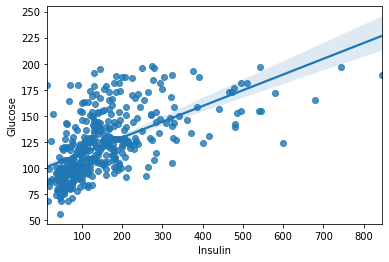

In [24]:
sns.regplot(data=df_matrix, x="Insulin", y="Glucose")

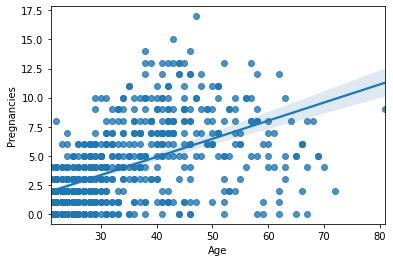

In [26]:
sns.regplot(data=df,x="Age",y="Pregnancies")
#regplot은 hue를 지원해주지 않아서 lmplot을 이용해야한다

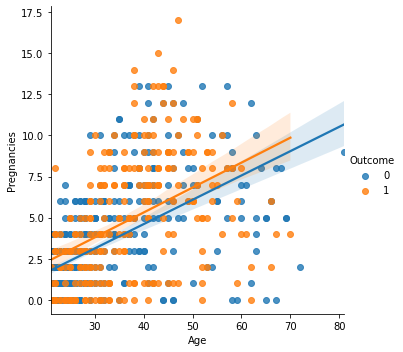

In [27]:
sns.lmplot(data=df, x="Age", y="Pregnancies", hue="Outcome")

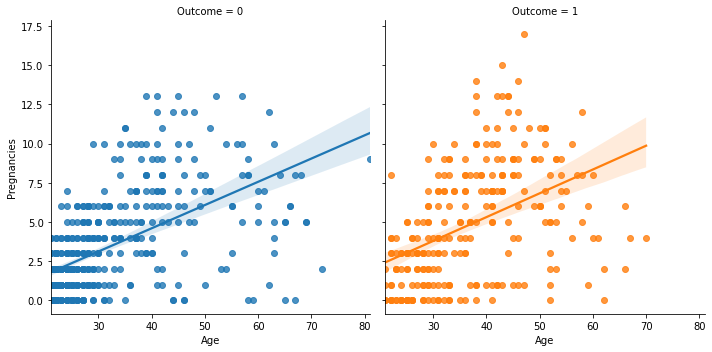

In [28]:
sns.lmplot(data=df, x="Age", y="Pregnancies", hue="Outcome",col ="Outcome")